Homework 4, CS 641 

First, import data from the file named mnist23.data. Place the file in the running directory of jupyter notebook for simplicity 

In [3]:
import cloudpickle as pickle
mnist23 = pickle.load( open( "mnist23.data", "rb" ) )

then run the following code to view the data

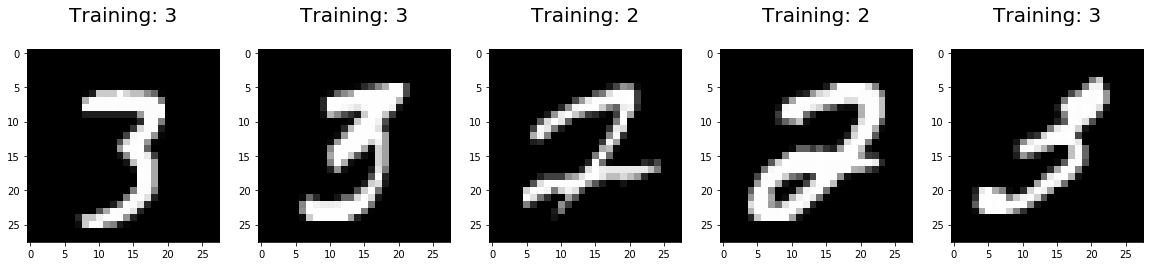

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(mnist23.data[500:505], mnist23.target[500:505])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

mnist23 consists of more than ten thousands images of 2s and 3s. You can view the data as follows:

In [5]:
mnist23,mnist23.data, mnist23.target, mnist23.data.shape


({'COL_NAMES': ['label', 'data'],
  'DESCR': 'mnist23: mnist data 2 and 3',
  'data': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  'target': array([2., 2., 3., ..., 3., 2., 3.])},
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([2., 2., 3., ..., 3., 2., 3.]),
 (12111, 784))

In [6]:
mnist23.data.shape, mnist23.target.shape


((12111, 784), (12111,))

In this homework, you are asked to implement your own binary classifier in jupyter notebook to classify the image. Each image is a 28 by 28 image, which is a row of the above numpy ndarray. So you need to reshape it to 8 by 8 to view an image. Implement in the following. You may want to create a python class for your classifier, with train, validate, predict and some other functions

In [31]:
from sklearn.metrics import accuracy_score
import numpy as np

class KNN(object):

    def __init__(self):
        pass

    def train(self, x, y):
        self.X_train = x
        self.Y_train = y

    def predict(self, X_test, k=1):
        y_predict = []
        for i in range(len(X_test)):
            distance = np.sqrt(np.sum(np.square(X_test[i] - self.X_train), axis=1))
            y_neighbours = self.Y_train[np.argsort(distance, axis=0)[:k]]
            unique, counts = np.unique(y_neighbours, return_counts=True)
            count_dict = dict(zip(unique, counts))
            y_predict.append(max(count_dict, key=count_dict.get))
            
        return y_predict

    def report(self, X_test, y_test, k=1):
        predictions = self.predict(X_test,k)
        return accuracy_score(y_test, predictions) * 100

    def validate(self, X_validate, y_validate):
        k_range = 50
        accuracy = []
        max_accuracy = 0
        optimal_k = 1
        
        for j in range(0,k_range,4):
            print("Calculating for K-value: {0}".format(j+1))
            result = self.report(X_validate,y_validate, k=j+1)
            accuracy.append([result, j+1])
            print("K-value: {0}, Accuracy: {1}".format(j+1, result))
            if max_accuracy < result:
                max_accuracy = result
                optimal_k = j+1
                
        plot_accuracy = list(zip(*accuracy))
        plt.plot(list(plot_accuracy[1]), list(plot_accuracy[0]))
        plt.xlabel('Hyperparameter K')
        plt.ylabel('Accuracy (%)')
        plt.title('Model Validating')
        plt.show()
        
        return optimal_k

Then, in the following, write a separate function so that when new test data is given, then accuracy can be computed. The function will take the test images (in a matrix of shape (x, 784)), and their labels (in a ndarray of shape(x,), and other parameters as you see fit. The test images are not given to you. 
Your numeric grade for the howework will be no more than the percentage of the accuracy of your classifier.  

Start training ...
End training ...
Start validating ...
Calculating for K-value: 1
K-value: 1, Accuracy: 97.27497935590421
Calculating for K-value: 5
K-value: 5, Accuracy: 97.56399669694467
Calculating for K-value: 9
K-value: 9, Accuracy: 97.44013212221306
Calculating for K-value: 13
K-value: 13, Accuracy: 97.44013212221306
Calculating for K-value: 17
K-value: 17, Accuracy: 97.02725020644097
Calculating for K-value: 21
K-value: 21, Accuracy: 96.73823286540049
Calculating for K-value: 25
K-value: 25, Accuracy: 96.73823286540049
Calculating for K-value: 29
K-value: 29, Accuracy: 96.53179190751445
Calculating for K-value: 33
K-value: 33, Accuracy: 96.3253509496284
Calculating for K-value: 37
K-value: 37, Accuracy: 96.36663914120561
Calculating for K-value: 41
K-value: 41, Accuracy: 96.16019818331957
Calculating for K-value: 45
K-value: 45, Accuracy: 95.91246903385631
Calculating for K-value: 49
K-value: 49, Accuracy: 95.66473988439307


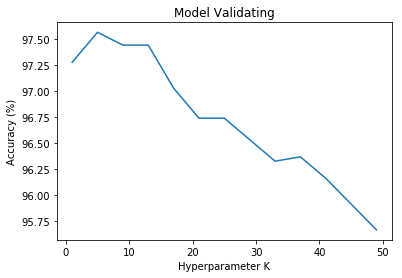

Optimal K: 5
End validating ...
Start testing ... 
End testing ...
Accuracy: 98.43 %


In [32]:
from sklearn.model_selection import train_test_split

train_img, test_img, train_lbl, test_lbl = train_test_split(mnist23['data'],mnist23['target'],test_size=0.20, random_state = 0)
train_img, valid_img, train_lbl, valid_lbl = train_test_split(train_img, train_lbl, test_size=0.25, random_state = 0)

# ------------------------- Modifying image size (PCA) -----------------------

from skimage import img_as_float
train_img = img_as_float(train_img)
valid_img = img_as_float(valid_img)

#-------------------------- Decrease training sample --------------------------
train_img_small = train_img[3500:4500]
train_lbl_small = train_lbl[3500:4500]
#----------------------------- Training sample --------------------------


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(train_img)

# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
train_img_small = scaler.transform(train_img_small)
valid_img = scaler.transform(valid_img)

from sklearn.decomposition import PCA

# Make an instance of the Model
pca = PCA(.85)
pca.fit(train_img)
train_img = pca.transform(train_img)
train_img_small = pca.transform(train_img_small)
valid_img = pca.transform(valid_img)

#------------------------------ end PCA --------------------------------

def binaryClassify(test_img, test_lbl):
    
    #----------- PCA test imgage --------------
    test_img = img_as_float(test_img)
    test_img = scaler.transform(test_img)
    test_img = pca.transform(test_img)
    #-------------- PCA end -------------------
    
    a = KNN()
    print("Start training ...")
    a.train(train_img_small, train_lbl_small)
    print("End training ...")
    print("Start validating ...")
    k = a.validate(valid_img, valid_lbl)
    print("Optimal K: {0}".format(k))
    print("End validating ...")
    print("Start testing ... ")
    a.train(train_img, train_lbl)
    accuracy = a.report(test_img, test_lbl, k)
    print("End testing ...")
    print("Accuracy: {0:.2f} %".format(accuracy))
    

binaryClassify(test_img, test_lbl)
